In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor   #

In [2]:
data_2d = pd.read_csv('data_2d.csv')
data_mnist = pd.read_csv('mnist.csv')
X_2d = data_2d.iloc[:, [1, 2]].values
print(f'Counts data: {len(X_2d)}')
lof = LocalOutlierFactor()
y_pred_2d = lof.fit_predict(X_2d)
X_2d = X_2d[y_pred_2d == 1]
print(f'Counts after delete anomalys: {len(X_2d)}')

Counts data: 199
Counts after delete anomalys: 191


In [3]:
pca = PCA(n_components=2)
X_mnist = pca.fit_transform(data_mnist)
print(f'Counts data: {len(X_mnist)}')
y_pred_mnist = lof.fit_predict(X_mnist)
X_mnist = X_mnist[y_pred_mnist == 1]
print(f'Counts after delete anomalys: {len(X_mnist)}')

Counts data: 499
Counts after delete anomalys: 489


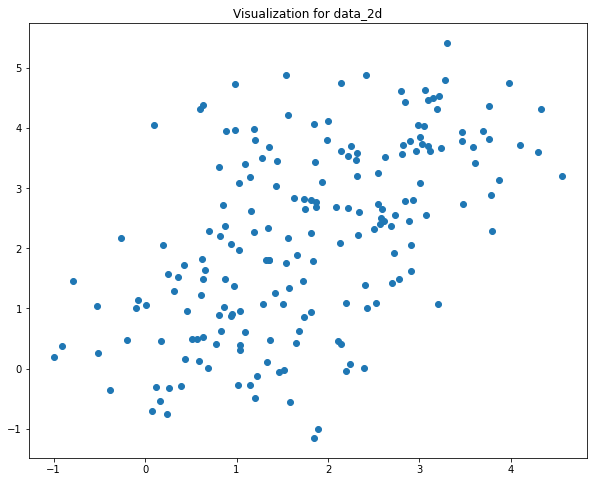

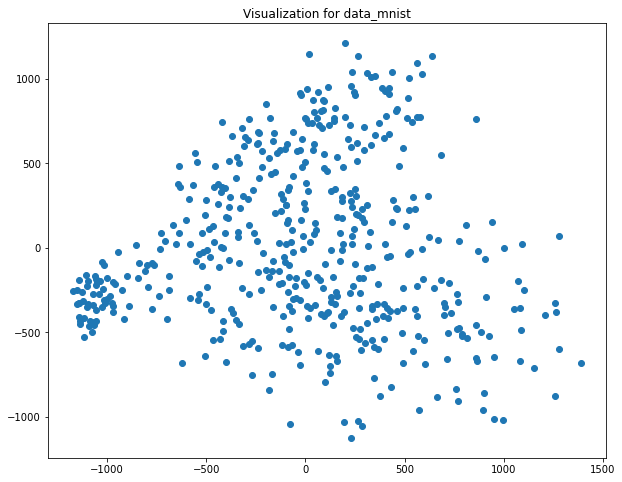

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.title('Visualization for data_2d')
plt.show()
plt.figure(figsize=(10, 8))
plt.scatter(X_mnist[:, 0], X_mnist[:, 1])
plt.title('Visualization for data_mnist')
plt.show()

In [5]:
def find_elbow_method(data):
    result = []
    for i in range(1, 8):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
        kmeans.fit(data)
        result.append(kmeans.inertia_)
    return result
        
def show_method_elbow(func):
    plt.figure(figsize=(11,7))
    plt.plot(range(1, 8), func, 'bx-')
    plt.xticks(np.arange(1, 8, step=1))
    plt.ylabel('Loss')
    plt.xlabel('Number of clusters')
    plt.show()

Number of clusters for data_mnist:


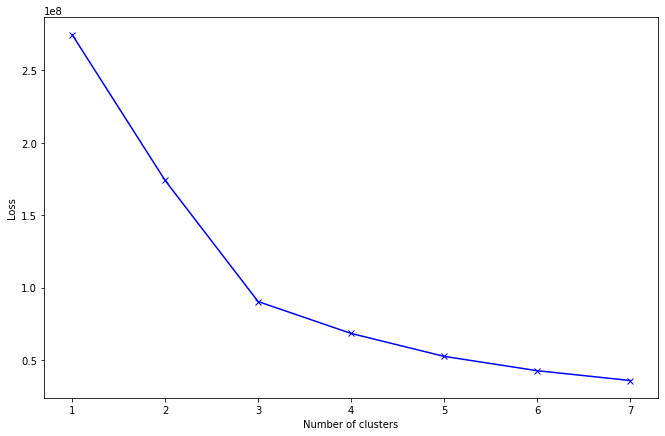

Number of clusters for data_2d:


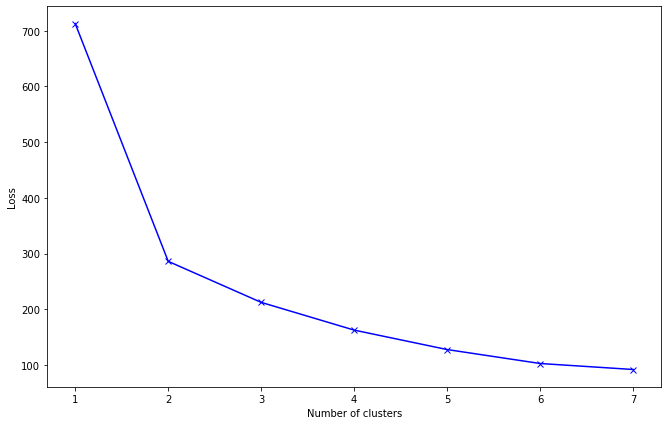

In [6]:
print('Number of clusters for data_mnist:')
show_method_elbow(find_elbow_method(X_mnist))
print('Number of clusters for data_2d:')
show_method_elbow(find_elbow_method(X_2d))


In [7]:
def search_clusters(data, number):
    kmeans = KMeans(n_clusters = number, init = "k-means++", random_state = 42)
    y_kmeans = kmeans.fit_predict(data)
    
    plt.figure(figsize=(8, 6))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime', 'navy', 'purple']
    
    for i in range(kmeans.cluster_centers_.shape[0]):
        plt.scatter(data[y_kmeans == i, 0], data[y_kmeans == i, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
        
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='black', label='Centroids', marker='X')
    
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

Visualization for cluster data_mnist:


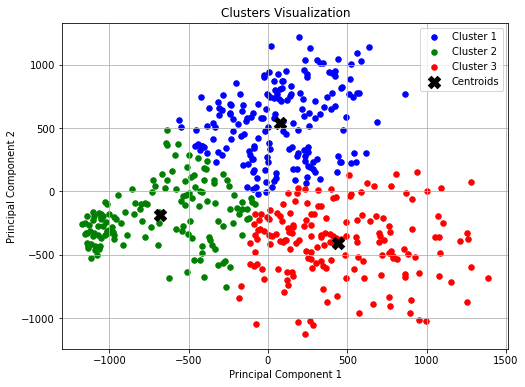

Visualization for cluster data_2d:


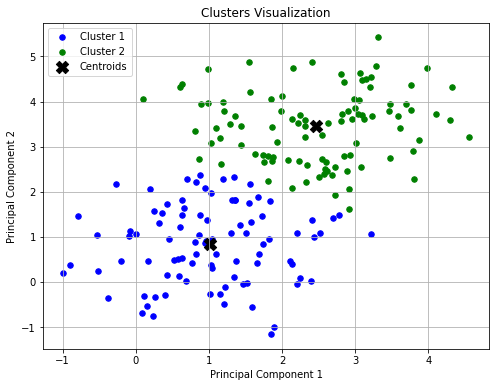

In [8]:
print('Visualization for cluster data_mnist:')
search_clusters(X_mnist, 3)
print('Visualization for cluster data_2d:')
search_clusters(X_2d, 2)